# Used Algerin_Forest_Prediction
**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Exploratory Data Analysis
* Data Cleaning
* Data Pre-Processing
* Model Training
* Choose best model

## 1) Problem statement

* This dataset comprises of forest fires in Algeria.The data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria are considered.
* If user can predict the forest fire in Algerian region based on input features.
* Prediction results can be used to give forest fire dates and for making  preventive actions.

## 2) Data Collection
* The Dataset is collected from scrapping UCI Machine Learning Repository Algerian Forest Fires Dataset 
* The data consists of 14 column and 122 rows for Bejaia region and  122 rows forSidi-Bel Abbes Region Dataset

In [ ]:
### Feature Information
* **day:** Day of information.
* **month:** Month of information
* **year:** Year 
* **Temperature:** Temperature in the region
* **RH:** Realtive Humidity
* **WS:** Wind Speed
* **Rain:** Rain
* **FFMC:** Fine Fuel Moisture Code:represents the moisture content of litter and other fine fuels in a forest stand, in a layer of dry weight ∼0.25 kg m−2 (time constant about 2/3days). It is an indicator of sustained flaming ignition and fire spread.
* **DMC:** Duff Moisture Code: represents the moisture content of loosely compacted, decomposing organic matter weighing about        5 kg m−2 when dry (time constant about 12 days).It relates to the probability of lightning ignition and fuelconsumption
* **ISI:** Initial Spread Index: is a combination of wind and FFMC representing rate of spread without the variable        influence of fuel 
* **BUI:**Build-Up index: is a combination of DMC and DC representing total fuel available to the spreading fire. It is         correlated with fuel consumption.
* **FWI:** Fire Weather Index:is a combination of ISI and BUI representing intensity of the spreading fire as energy rate per unit length of fire front. It is often used as a single integration of fire weather 
* **Classes:** it gives whether fire occured or not 
* **Region:** 1=  Bejaia Region Dataset,  2=Sidi-Bel Abbes Region Dataset 
* **DC**:** Drought Code:** represents a deep layer of compact organic matter weighing about 25 kg m−2 when dry It relates to the consumption of heavier fuels and the effort required to extinguish a fire.
* **HFI:** Head Fire Intensity:estimates the amount of energy released per unit time per unit fire front line. good indicator of fire behaviour andHFI forecasts are used to assess potential risks to wildland firefighters. HFI is dependent on the fuel type, and has units of MW m−1. Iis a function of fuel consumption and rate of spread, assuming the heat of combustion is a constant 18 MJ kg−1.
* **DSR:** Daily Severity Rating: is a power function of FWI representing a measure of control difficulty for a fire. 
*  ** BUI=DMC+DC
*  ** FWI=ISI +BUI

### 2.1 Import Data and Required Packages
**  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
from six.moves import urllib
warnings.filterwarnings("ignore")
%matplotlib inline
import os


#### Download and Import the CSV Data as Pandas DataFrame

In [4]:

df=pd.read_csv("D:\ineuron\EDA _Dataset\Dataset\Data10\Algerian_forest_fires_dataset_UPDATE.csv")

In [5]:
df

,Bejaia Region Dataset,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
1,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
2,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
3,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
4,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
244,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
245,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
246,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [6]:
#Extract Bejaia Region Dataset,#Assign 1 to  Bejaia Region Dataset
# Assign 0 toSidi-Bel Abbes Region Dataset
df2=pd.read_csv("D:\ineuron\EDA _Dataset\Dataset\Data10\Algerian_forest_fires_dataset_UPDATE.csv",header=1)



In [7]:
df2.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [8]:
df2.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
246,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


#### Data Observations¶
* DD/MM/Year :month ('june' to 'september'), year (2012)
* Temperature:temperature noon (temperature max) :24 to 42 in degree celsius
* Relative Humidity(%): 21to 90
* WS:6 to 29 km/h
* Rain:0 to 16.8 total day in mm
* FFMC:28.6 to 96
* DMC:0.7to 65.9
* DC:6.9 to 220.4
* ISI:0 to 19
* BUI: 1.1 to 68
* FWI: 0 to 31.1
* classes:fire/not fire


In [9]:
df2.shape

(247, 14)

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


### All the features are of object datatype, whcih i need to convert it into integer in order to perform regression analysis

In [11]:
df2.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [12]:
df2[df2.isnull().any(axis=1)] # inorder to check the row which is having the missing values

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14. 69,12.5,10.4,fire,NaN


###### * Here the Missing values at 122th ,123 and168 index seprate the data set in two regions.

In [13]:
df2[df2.duplicated()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [14]:
df2.loc[:122,'Region']=1
df2.loc[122:,'Region']=2
df2[['Region']] = df2[['Region']].astype(int)

In [15]:
df2

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,2
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,2
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [16]:
df2.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
Region         0
dtype: int64

In [17]:
# Remove null or na values rows
#df2 =df2.dropna([122:124]).reset_index(drop=True) 

df2=df2.dropna().reset_index(drop=True)
df2.shape

(244, 15)

In [18]:
df2.to_csv("D:\ineuron\EDA _Dataset\Dataset\Data10\modified_fire.csv")

In [19]:
# Column which has string
df2.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,2


In [20]:
df2.to_csv("D:\ineuron\EDA _Dataset\Dataset\Data10\modified_fire.csv")

In [21]:
#remove 122th row
df2 = df2.drop(122).reset_index(drop=True)
pd.set_option('display.max_rows', None)
df2

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
5,6,6,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire,1
6,7,6,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire,1
7,8,6,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire,1
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,1
9,10,6,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,1


In [22]:
df2.to_csv("D:\ineuron\EDA _Dataset\Dataset\Data10\modified_fire.csv")

#### Check Datatypes in the dataset

In [27]:
df2.shape

(243, 15)

In [28]:
# List out column names to check 
df2.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

* Here in some of the columns are misspaced so need to remove the space to make the column name simple

In [29]:
# Spaces were fixed in the column names
df2.columns = df2.columns.str.strip()
df2.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

### Changing the data types into the required data types for the respective features for the analysis

In [30]:
df2[['month', 'day', 'year', 'Temperature','RH', 'Ws']] = df2[['month', 'day', 'year', 'Temperature','RH', 'Ws']].astype(int)

In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int32 
 1   month        243 non-null    int32 
 2   year         243 non-null    int32 
 3   Temperature  243 non-null    int32 
 4   RH           243 non-null    int32 
 5   Ws           243 non-null    int32 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(7), object(8)
memory usage: 22.0+ KB


In [32]:
cat1 = [fea for fea in df2.columns if df2[fea].dtypes=='O']
for i in cat1:
    if i != 'Classes':
        df2[i] = df2[i].astype(float)

In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


### Display summary statistics for a dataframe

In [ ]:
# Display summary statistics for a dataframe
df2.describe().T

In [34]:
df2.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
day,243.0,NaN,NaN,NaN,15.761317,8.842552,1.0,8.0,16.0,23.0,31.0
month,243.0,NaN,NaN,NaN,7.502058,1.114793,6.0,7.0,8.0,8.0,9.0
year,243.0,NaN,NaN,NaN,2012.0,0.0,2012.0,2012.0,2012.0,2012.0,2012.0
Temperature,243.0,NaN,NaN,NaN,32.152263,3.628039,22.0,30.0,32.0,35.0,42.0
RH,243.0,NaN,NaN,NaN,62.041152,14.82816,21.0,52.5,63.0,73.5,90.0
Ws,243.0,NaN,NaN,NaN,15.493827,2.811385,6.0,14.0,15.0,17.0,29.0
Rain,243.0,NaN,NaN,NaN,0.762963,2.003207,0.0,0.0,0.0,0.5,16.8
FFMC,243.0,NaN,NaN,NaN,77.842387,14.349641,28.6,71.85,83.3,88.3,96.0
DMC,243.0,NaN,NaN,NaN,14.680658,12.39304,0.7,5.8,11.3,20.8,65.9
DC,243.0,NaN,NaN,NaN,49.430864,47.665606,6.9,12.35,33.1,69.1,220.4


## 3. EXPLORING DATA

In [35]:
# define numerical & categorical columns
numeric_features=[feature for feature in df2.columns if df2[feature].dtype!='O']
categorical_features = [feature for feature in df2.columns if df2[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 14 numerical features : ['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region']

We have 1 categorical features : ['Classes']


In [36]:
df2["Classes"].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

* Dependent feature(Classes) containig only two categories but due to misspace it is showing multiple category so need to change the spaceing in order to make two category



In [37]:
df2["Classes"]=df2["Classes"].str.strip()

In [38]:
df2["Classes"].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [39]:
df2.to_csv("D:\ineuron\EDA _Dataset\Dataset\Data10\modified_fire.csv")

### Univariate Analysis
* The 'Univariate Analysis 'refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

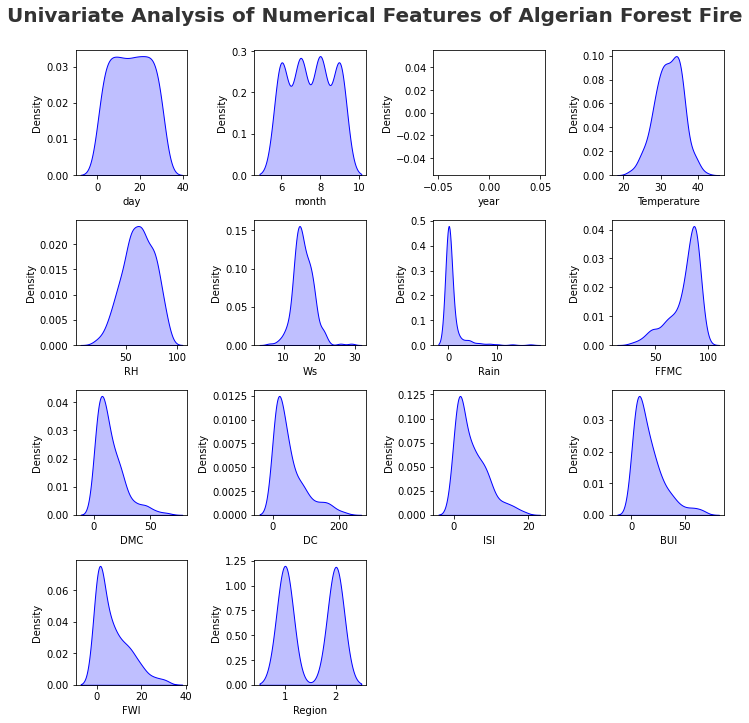

In [48]:
plt.figure(figsize=(10, 10))
plt.suptitle('Univariate Analysis of Numerical Features of Algerian Forest Fire', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0,len(numeric_features)):    
    plt.subplot(4, 4, i+1)
    sns.kdeplot(x=df2[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

## Multivariate Analysis
* Multivariate analysis is the analysis of more than one variable.

### Check Multicollinearity in Numerical features
* A correlation coefficient measures the strength of the relationship between two variables.
* A positive correlation indicates two variables that tend to move in the same direction.
* A negative correlation indicates two variables that tend to move in opposite directions.
*A correlation coefficient of -0.8 or lower indicates a strong negative relationship,
while a coefficient of -0.3 or lower indicates a very weak one.

In [40]:
df2[(list(df2.columns)[1:])].corr()

,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
month,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.001857
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,-0.056781,NaN,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.269555
RH,-0.041252,NaN,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.402682
Ws,-0.039880,NaN,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.181160
Rain,0.034822,NaN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.040013
FFMC,0.017030,NaN,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.222241
DMC,0.067943,NaN,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.192089
DC,0.126511,NaN,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,-0.078734
ISI,0.065608,NaN,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.263197


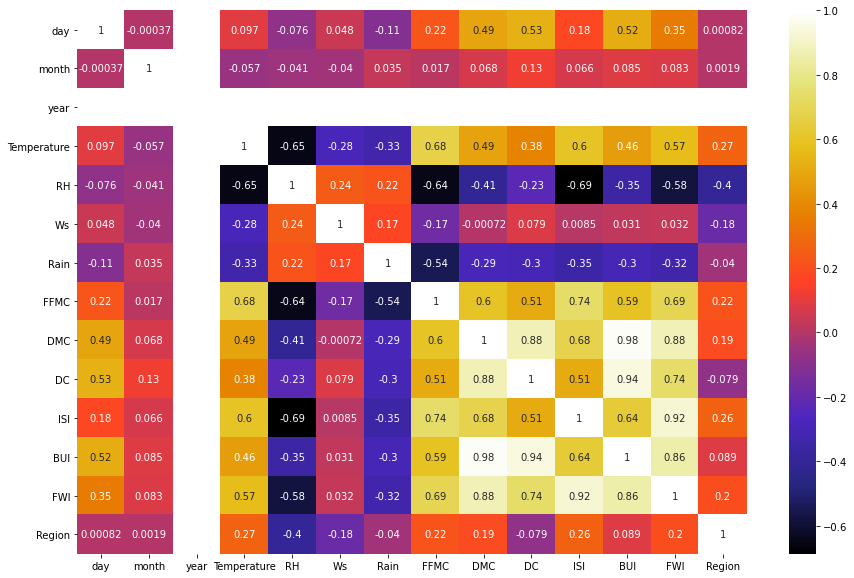

In [41]:
plt.figure(figsize = (15,10))
sns.heatmap(df2.corr(), cmap="CMRmap", annot=True)
plt.show()

**Report** 
* Our target column Classes which indicates fire or not fire has a strong positive correlation on RH ,Rain 
* Ws ,RH and Rain have a weak positive correlation with each other 
* The FFMC has strong positive correlation with tempurature and hence with Classes
* This relation  is also true for  other indices like DMC,MUI,,ISI ,FWI when considered tempurature.DC has weak positive relation with Tempurature
* Ws ,RH and Rain have negative correlation with tempurature
* WS has  weak negative correlation with  FMCC,DMC and weak positive correlation with BUI,,ISI,DC,FWI.
* Rain and RH weak negative correlation with FMCC,DMC, BUI,ISI,DC,FWI .
* FMCC has strong positive correaltion with DMC,BUI ISI,DC,FWI and vice-versa  and hence with Classess.

In [42]:
df3=df2
# Encoding Not fire as 0 and Fire as 1
df2['Classes']= np.where(df2['Classes']=='not fire',0,1)
df2.head(15)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,1
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,1
7,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1,1
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,0,1
9,10,6,2012,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,0,1


In [43]:
df2.tail(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
233,21,9,2012,35,34,17,0.0,92.2,23.6,97.3,13.8,29.4,21.6,1,2
234,22,9,2012,33,64,13,0.0,88.9,26.1,106.3,7.1,32.4,13.7,1,2
235,23,9,2012,35,56,14,0.0,89.0,29.4,115.6,7.5,36.0,15.2,1,2
236,24,9,2012,26,49,6,2.0,61.3,11.9,28.1,0.6,11.9,0.4,0,2
237,25,9,2012,28,70,15,0.0,79.9,13.8,36.1,2.4,14.1,3.0,0,2
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,2
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,2
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,2
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,2
242,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,2


In [64]:
df2.to_csv("D:\ineuron\EDA _Dataset\Dataset\Data10\modified_fire.csv", index=False)

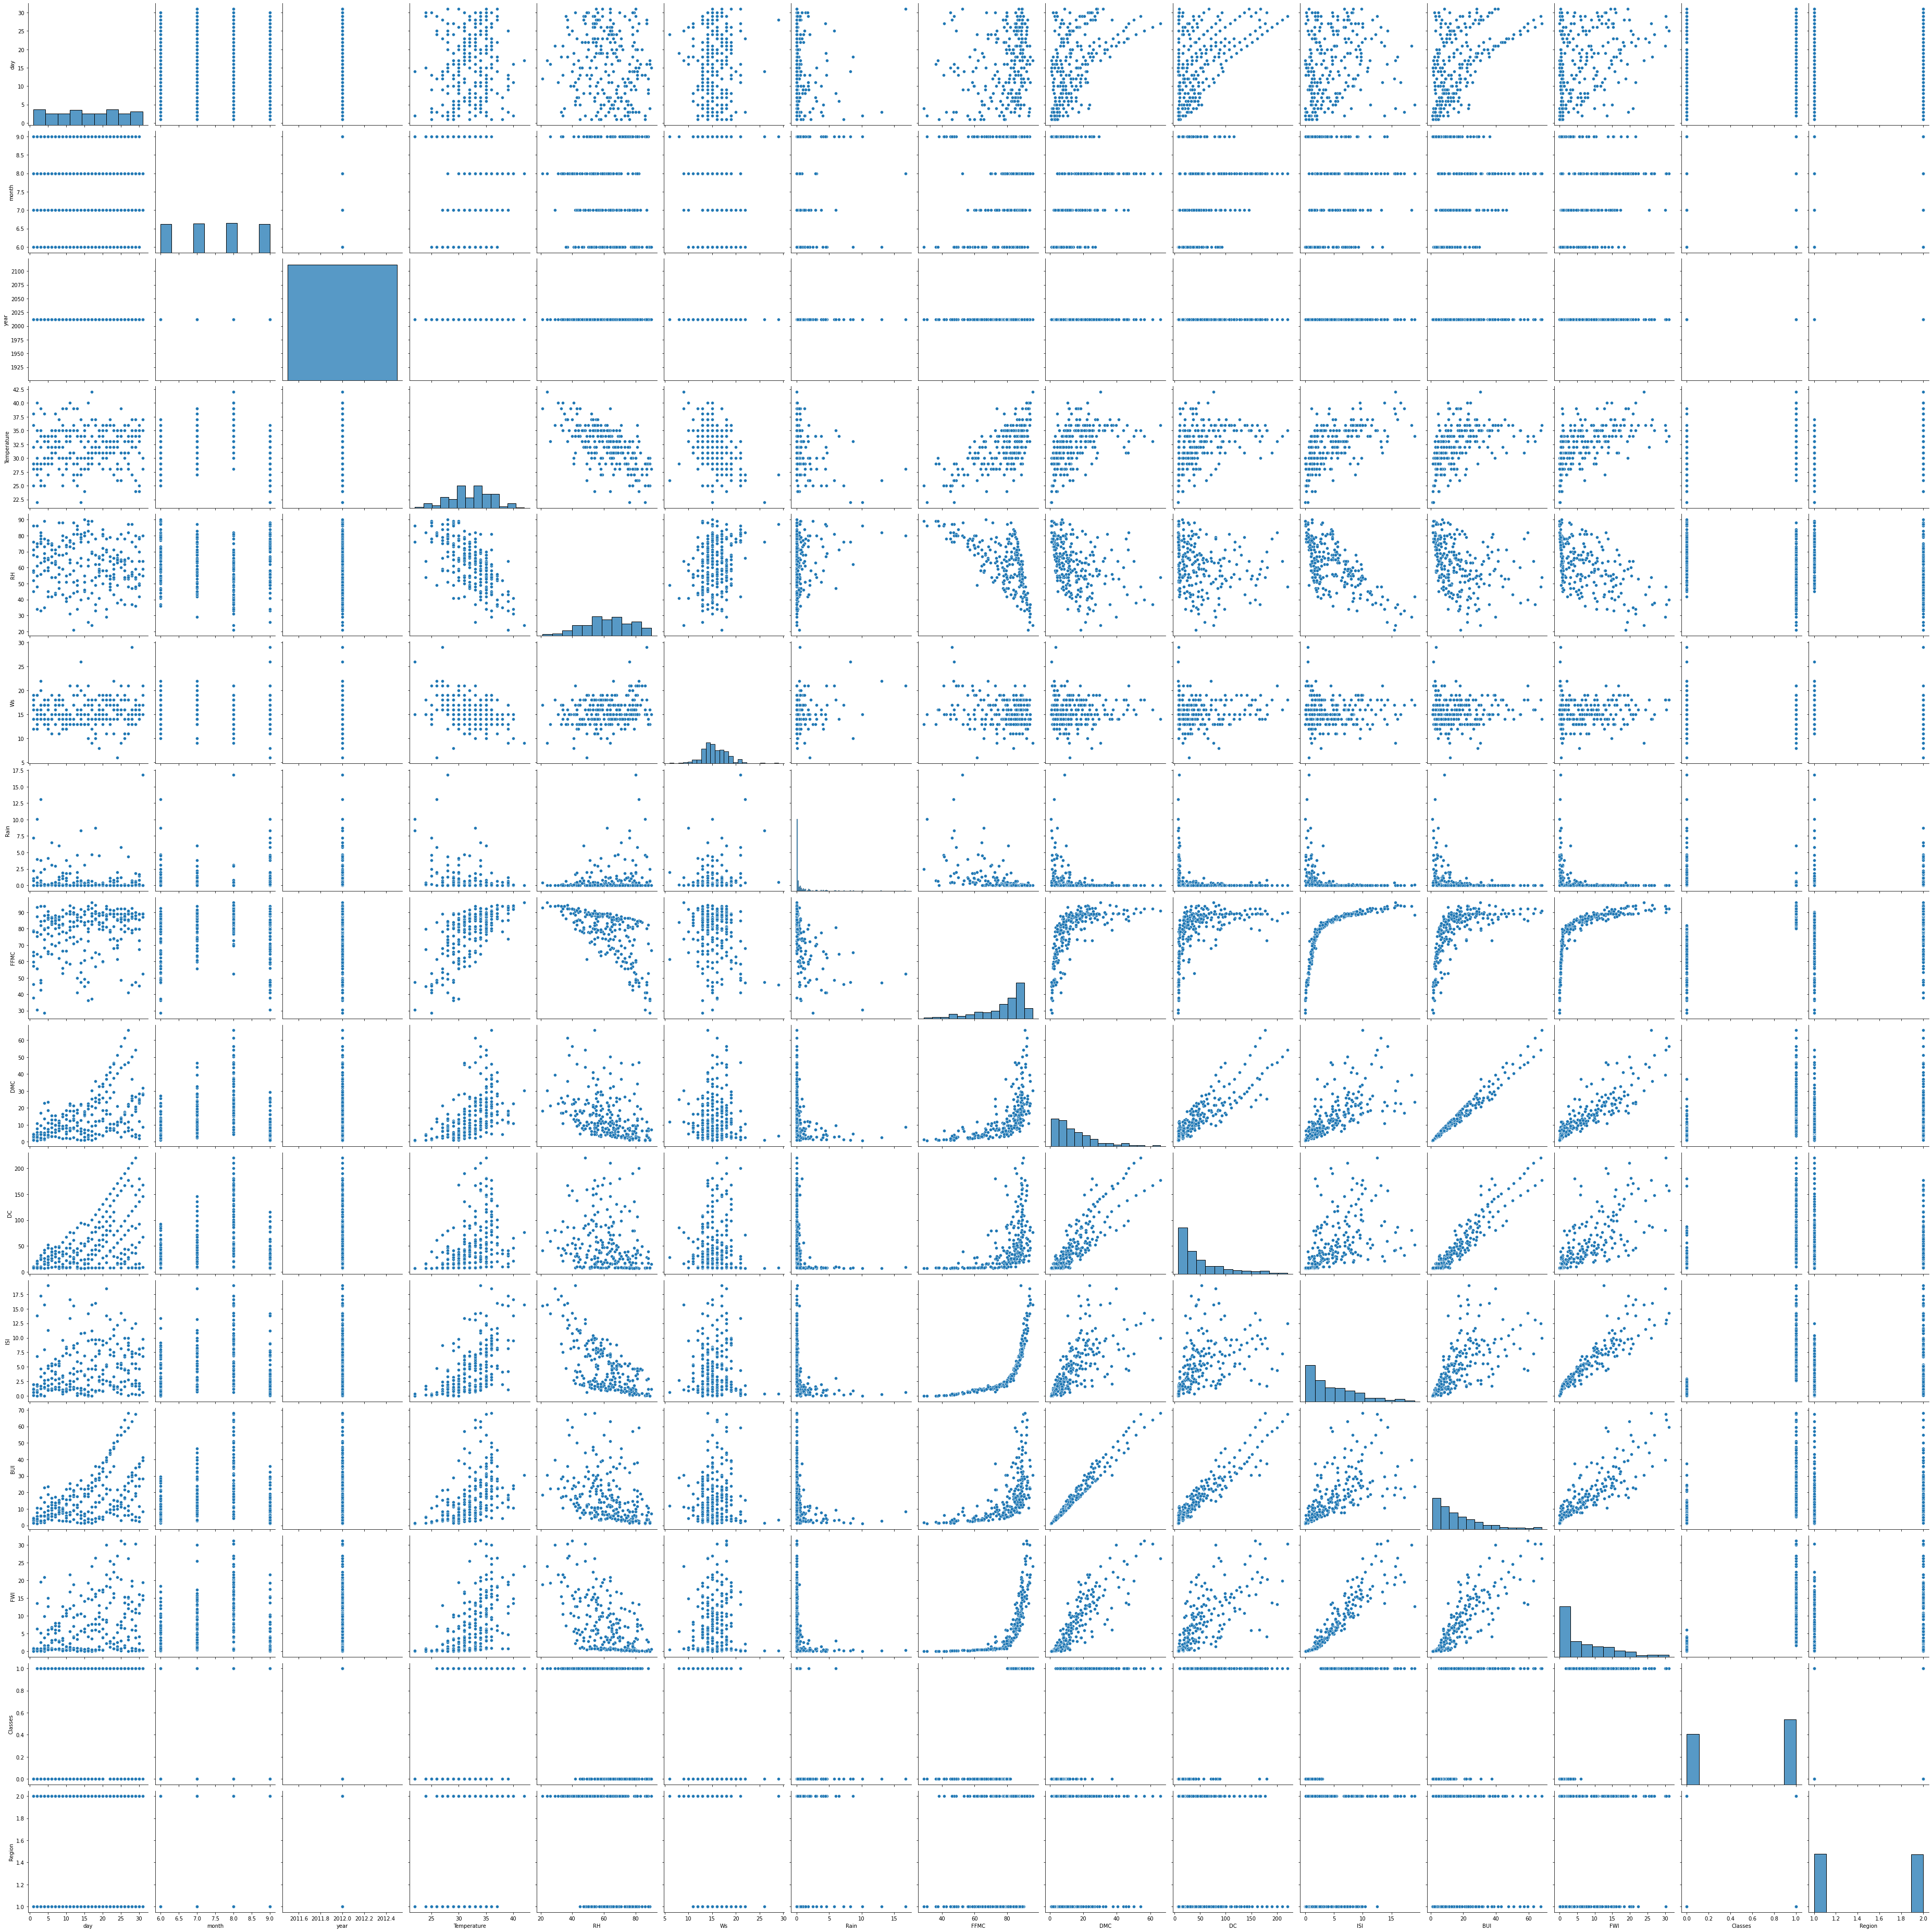

In [46]:
sns.pairplot(df2, height=3.5)

* ### Data Observations
* DD/MM/Year :month ('june' to 'september'), year (2012)
* Temperature:temperature noon (temperature max)  :24 to 42 in degree celsius
* Relative Humidity(%): 21to 90
* WS:6 to 29 km/h
* Rain:0 to 16.8 total day in mm
* FFMC:28.6 to 96
* DMC:0.7to 65.9
* DC:6.9 to 220.4
* ISI:0 to 19
* BUI: 1.1 to 68
* FWI:  0 to 31.1
* classes:fire/not fire
* Region:1/0    
         
        

## Multivariate Analysis
* Multivariate analysis is the analysis of more than one variable.

## Check Multicollinearity for Categorical features

* **A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test**

* **A chi-square statistic is one way to show a relationship between two categorical variables.**

* **Here we test correlation of Categorical columns with Target column i.e Classes**

In [52]:
##Return from chi2_contingency 
## chi2float:The test statistic.,p:float:The p-value of the test,dof:degree of freedom:int,expected:ndarray, same shape as observed
##The expected frequencies, based on the marginal sums of the table.

from scipy.stats import chi2_contingency
chi2_test = []
for feature in numeric_features:
    if chi2_contingency(pd.crosstab(df2['Classes'], df2[feature]))[1] < 0.05: ## pvalue at 1 position
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[numeric_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,day,Fail to Reject Null Hypothesis
1,month,Reject Null Hypothesis
2,year,Fail to Reject Null Hypothesis
3,Temperature,Reject Null Hypothesis
4,RH,Reject Null Hypothesis
5,Ws,Fail to Reject Null Hypothesis
6,Rain,Reject Null Hypothesis
7,FFMC,Reject Null Hypothesis
8,DMC,Reject Null Hypothesis
9,DC,Reject Null Hypothesis


### Observing FFMC

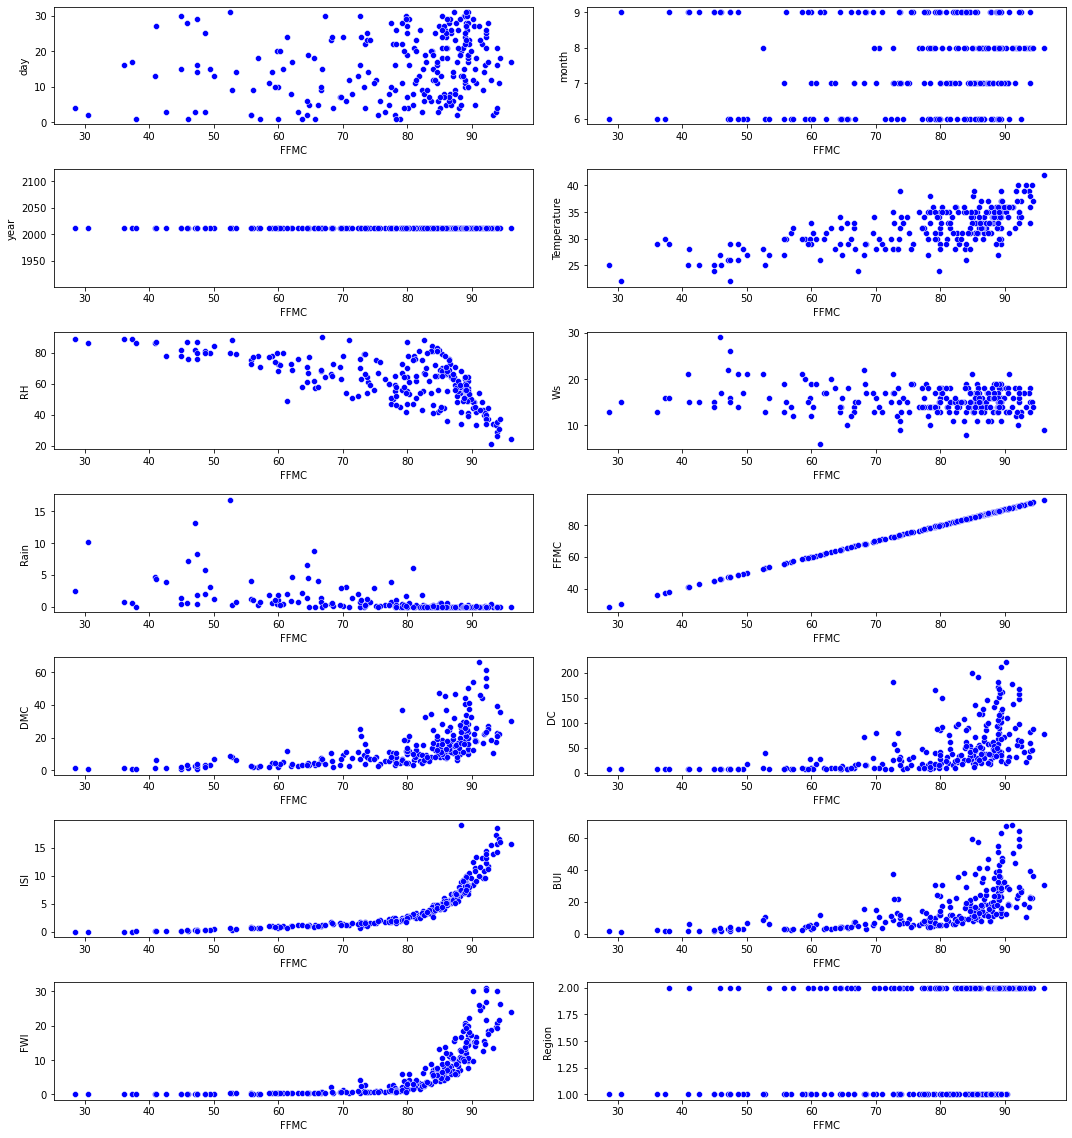

In [53]:
 
plt.figure(figsize=(15, 20))
for i in range(0,len(numeric_features)):
    ax = plt.subplot(9, 2, i+1)
    sns.scatterplot(data= df2 ,x= 'FFMC', y=numeric_features[i], color='b')
    plt.tight_layout()

### Observations
* FFMC has linear relationship with temp.As Temp increase FFMC also increases and hence Fire in the forest is declared
* Rain has inverse linear relationship with FFMC
* DMC,ISI,Dc,BUI,FWI have linear relationship ten its become exponentially increasing.

### Observing FWI

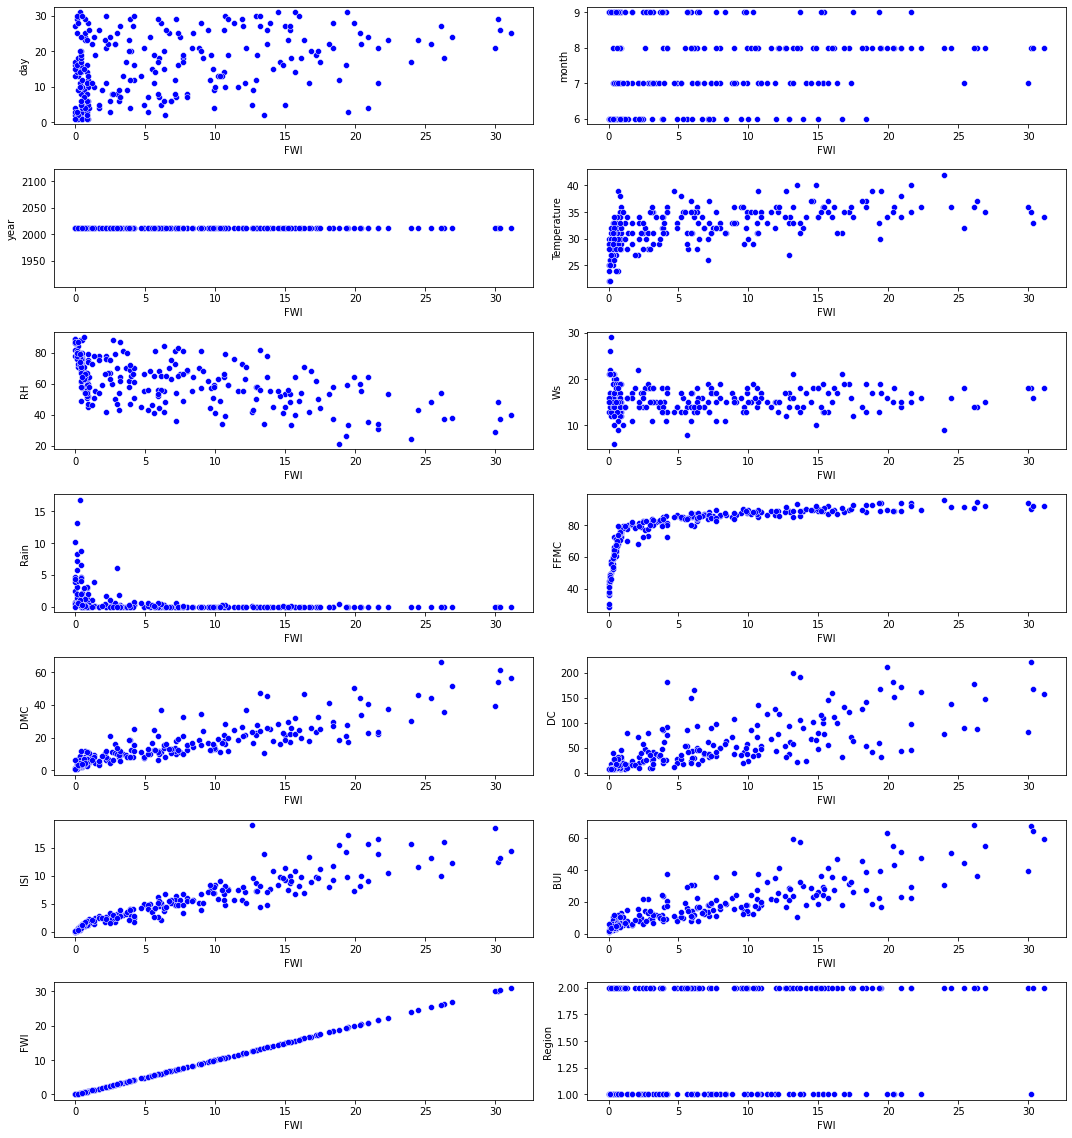

In [54]:
num_features = ['Temperature',' RH',' Ws','Rain ', 'DMC', 'DC', 'ISI', 'BUI', 'FFMC']  
plt.figure(figsize=(15, 20))
for i in range(0,len(numeric_features)):
    ax = plt.subplot(9, 2, i+1)
    sns.scatterplot(data= df2 ,x= 'FWI', y=numeric_features[i], color='b')
    plt.tight_layout()

### Observations: on FWI
* FWI has linear relationship with temp.As Temp increase FFMC also increases and hence Fire in the forest is declared
* Rain has inverse linear relationship with FMI.If rain increases ,FWI decreases that less spread of Fire
* FWI is inversly proportional to RH.
* FWI has linear relationship with ISI BUI as FWI =ISI+BUI,DMC and DC somwhat linear
* FFMC and FWI initally exponential then linear relationship

### Observations: on BUI

BUI:**Build-Up index: is a combination of DMC and DC representing total fuel available to the spreading fire. It iscorrelated with fuel consumption.

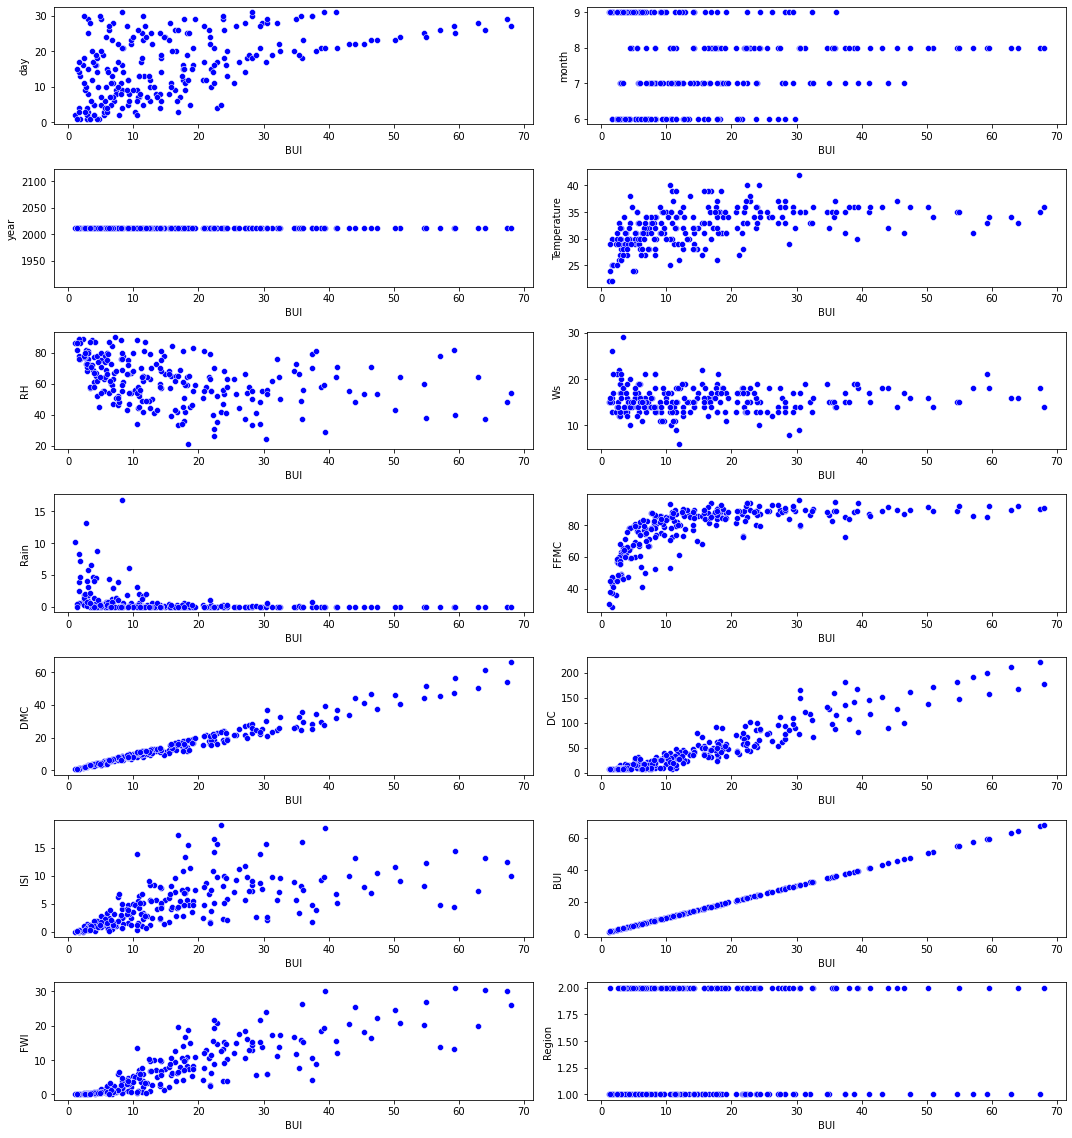

In [56]:
num_features = ['Temperature',' RH',' Ws','Rain ', 'DMC', 'DC', 'ISI', 'FWI', 'FFMC']  
plt.figure(figsize=(15, 20))
for i in range(0,len(numeric_features)):
    ax = plt.subplot(9, 2, i+1)
    sns.scatterplot(data= df2 ,x= 'BUI', y=numeric_features[i], color='b')
    plt.tight_layout()

### Observations: on FWI
* FWI has linear relationship with temp.As Temp increase FFMC also increases and hence Fire in the forest is declared
* Rain haslinear relationship with FMI.if raining then total fuel available for spreading is less that is BUI is also less
* FWI is inversly proportional to RH.
* BUI has strong linear relationship with DMC and DC as BUI=DMC+DC
* BUI  has linear relationship with ISI,  FWI
* FFMC and BUI  initally exponential then linear relationship

### Observating ISI
* Initial Spread Index: is a combination of wind and FFMC representing rate of spread without the variable influence of fuel 

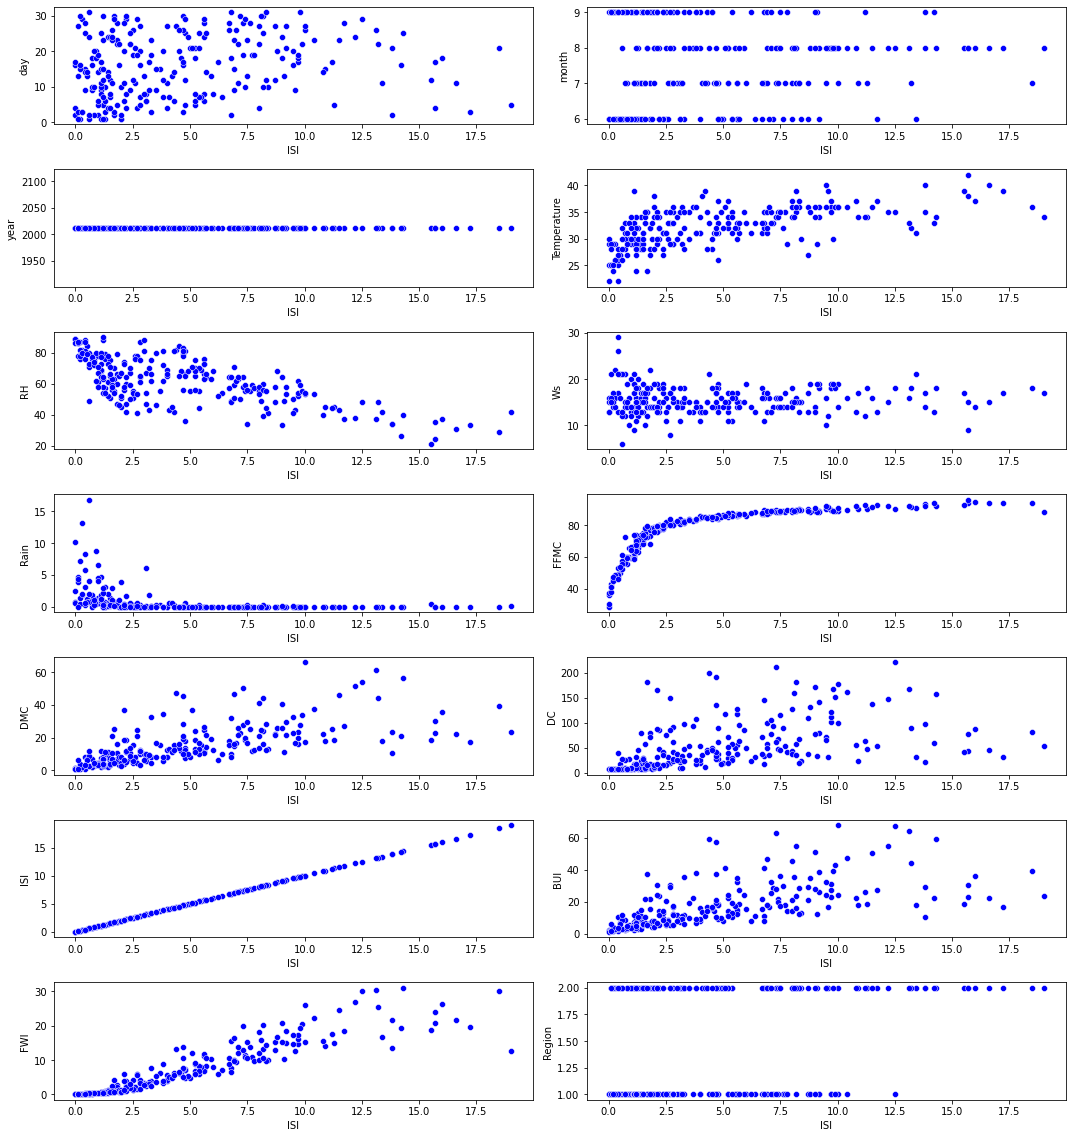

In [58]:
num_features = ['Temperature',' RH',' Ws','Rain ', 'DMC', 'DC', 'BUI', 'FWI', 'FFMC']  
plt.figure(figsize=(15, 20))
for i in range(0,len(numeric_features)):
    ax = plt.subplot(9, 2, i+1)
    sns.scatterplot(data= df2 ,x= 'ISI', y=numeric_features[i], color='b')
    plt.tight_layout()

### Observations: on ISI
* ISI has linear relationship with temp.As Temp increase ISI also increases and hence Fire in the forest is declared
* Rain,WS have linear relationship with FMI.if raining ,spreading is less that is ISI is also less.
* ISI is inversly proportional to RH,as RH is more less is the spread of fire
* ISI  is linearly proportional to FWI.
* BUI has  linear relationship with ISI
* FFMC and BUI  initally exponential then linear relationship.

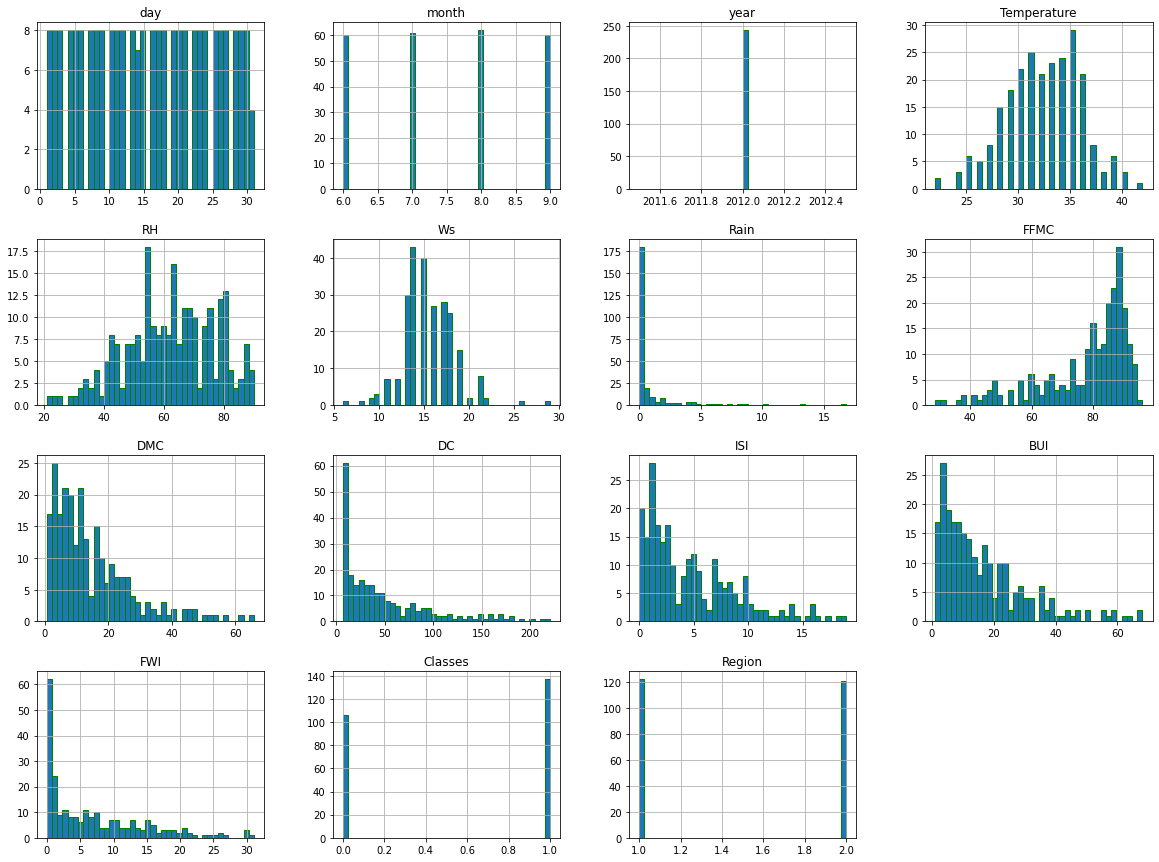

In [60]:
# PLot density plot for all features

df2.hist(bins=40, figsize=(20,15), ec = 'g')
plt.show()

In [65]:
# cal .Percentage for PieChart
percentage = df2.Classes.value_counts(normalize=True)*100
percentage

1    56.378601
0    43.621399
Name: Classes, dtype: float64

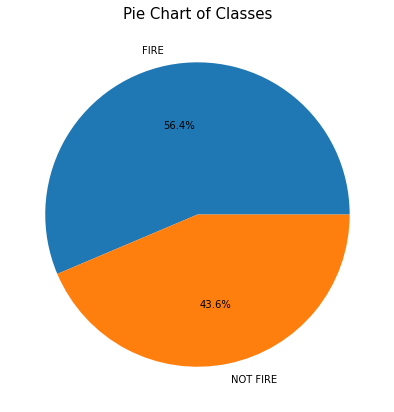

In [66]:
#plotting PieChart
classeslabels = ["FIRE", "NOT FIRE"]
plt.figure(figsize =(12, 7))
plt.pie(percentage,labels = classeslabels,autopct='%1.1f%%')  
plt.title ("Pie Chart of Classes", fontsize = 15)
plt.show()

Text(0.5, 1.0, 'Class Distributions \n 0: No Fire || 1: Fire')

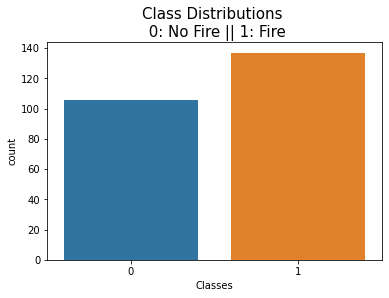

In [62]:
sns.countplot('Classes', data=df2, palette="tab10")
plt.title('Class Distributions \n 0: No Fire || 1: Fire', fontsize=15)

### Monthwise Analysis

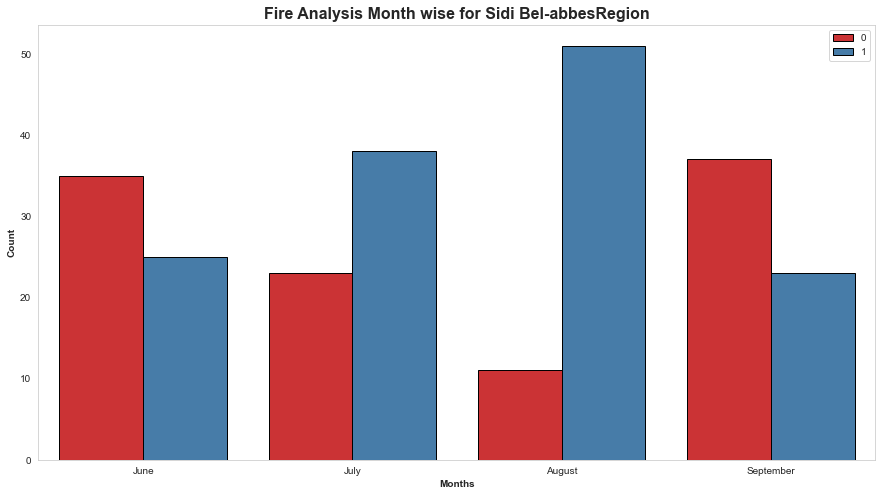

In [70]:
dftemp= df2.loc[df2['Region']== 2]
plt.subplots(figsize=(15,8))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data= df2,ec = 'black', palette= 'Set1')
plt.title('Fire Analysis Month wise for Sidi Bel-abbesRegion', fontsize=16, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()

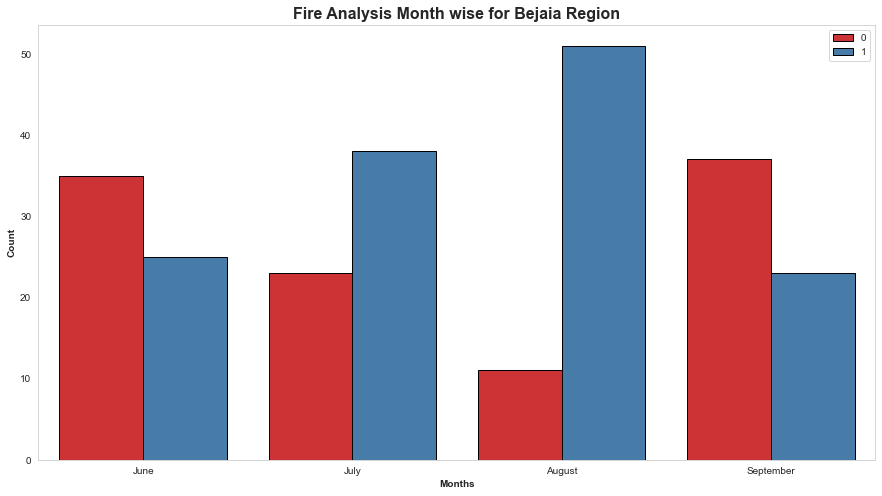

In [73]:
dftemp= df2.loc[df2['Region']== 1]
plt.subplots(figsize=(15,8))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data= df2,ec = 'black', palette= 'Set1')
plt.title('Fire Analysis Month wise for Bejaia Region', fontsize=16, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()